In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
#droping unecessary column
df.drop("_c39",axis=1,inplace=True)

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [9]:
#checking unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

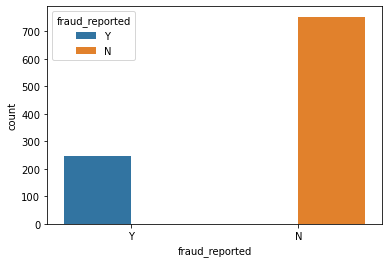

In [11]:
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')


In [12]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

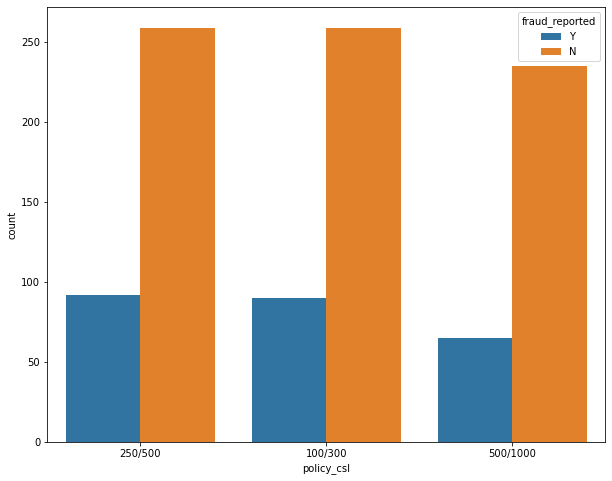

In [13]:
plt.figure(figsize=[10,8])
sns.countplot(df['policy_csl'], hue='fraud_reported', data=df)

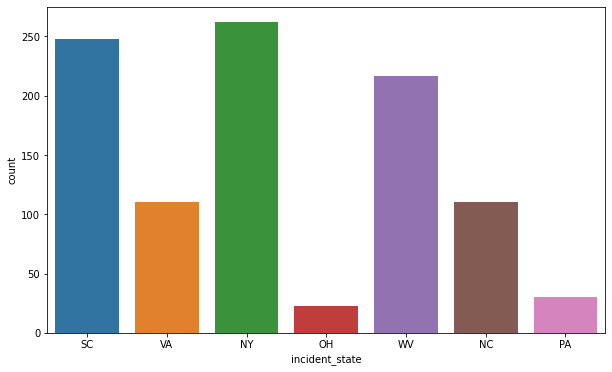

In [14]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

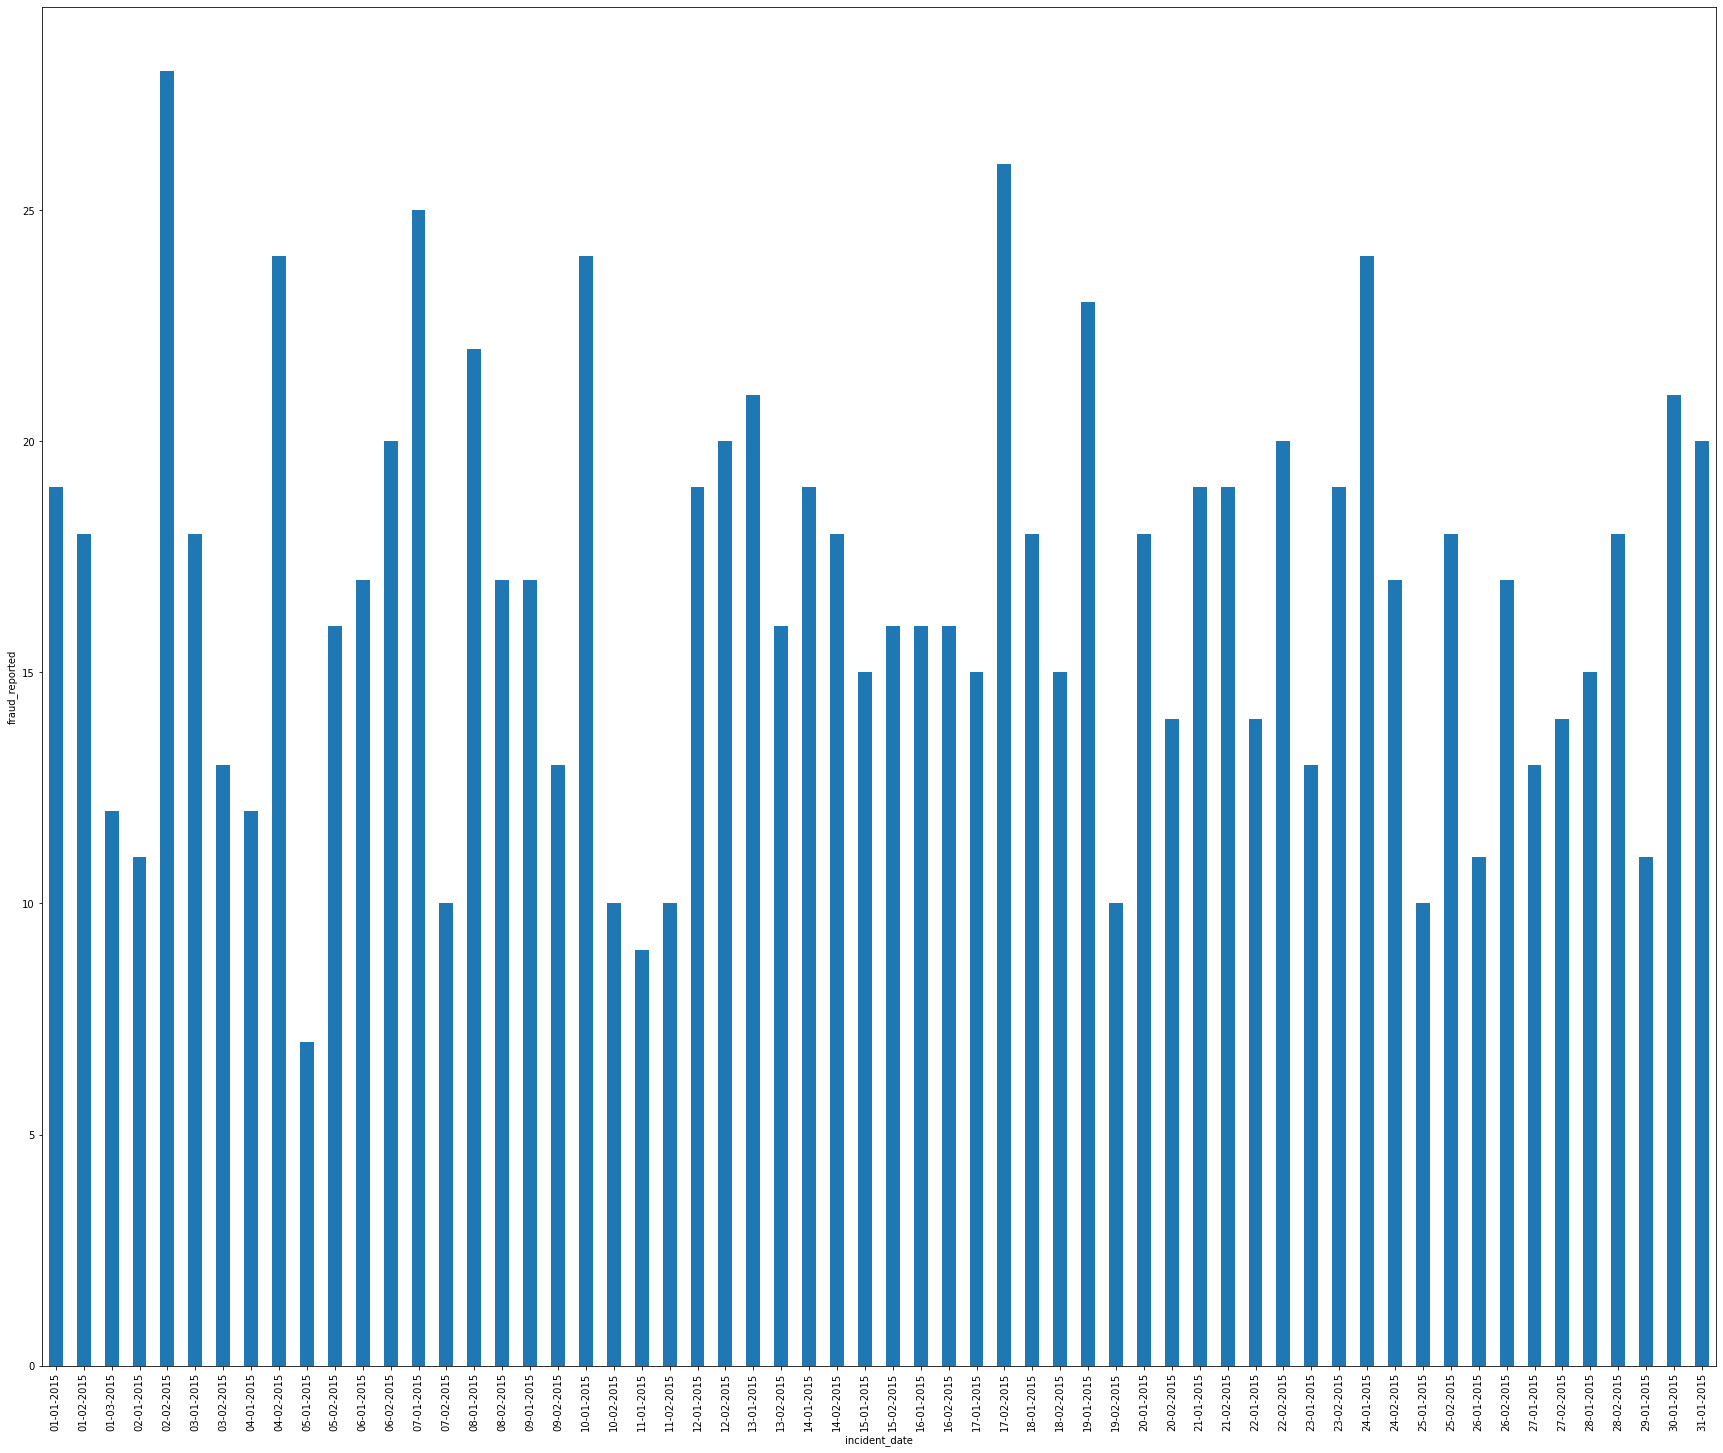

In [15]:
fig = plt.figure(figsize=(30,25))
ax = df.groupby('incident_date').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('fraud_reported')
plt.show()


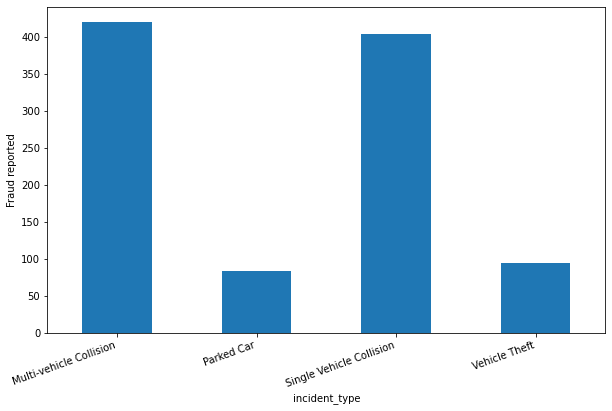

In [16]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

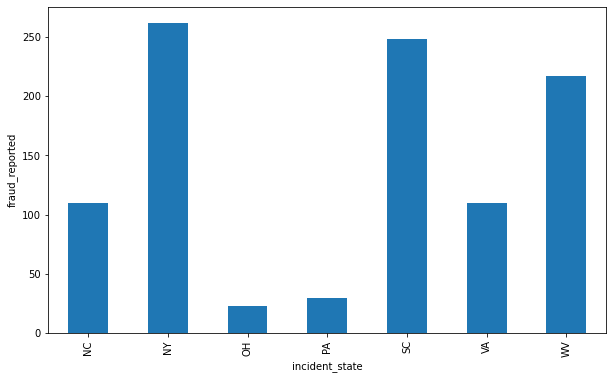

In [17]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('fraud_reported')
plt.show()

<AxesSubplot:xlabel='auto_make', ylabel='count'>

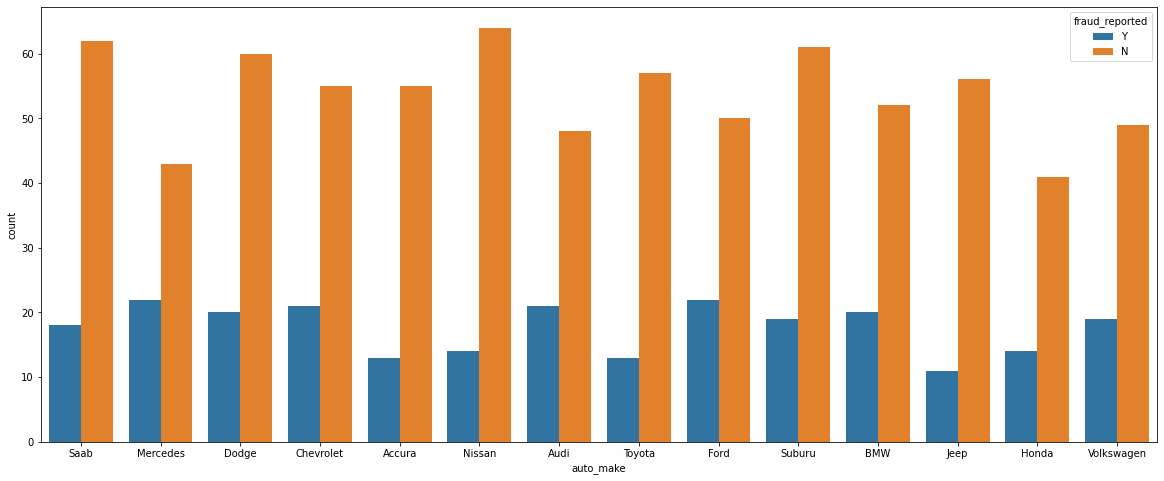

In [18]:
plt.figure(figsize=[20,8])
sns.countplot(df['auto_make'], hue='fraud_reported', data=df)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

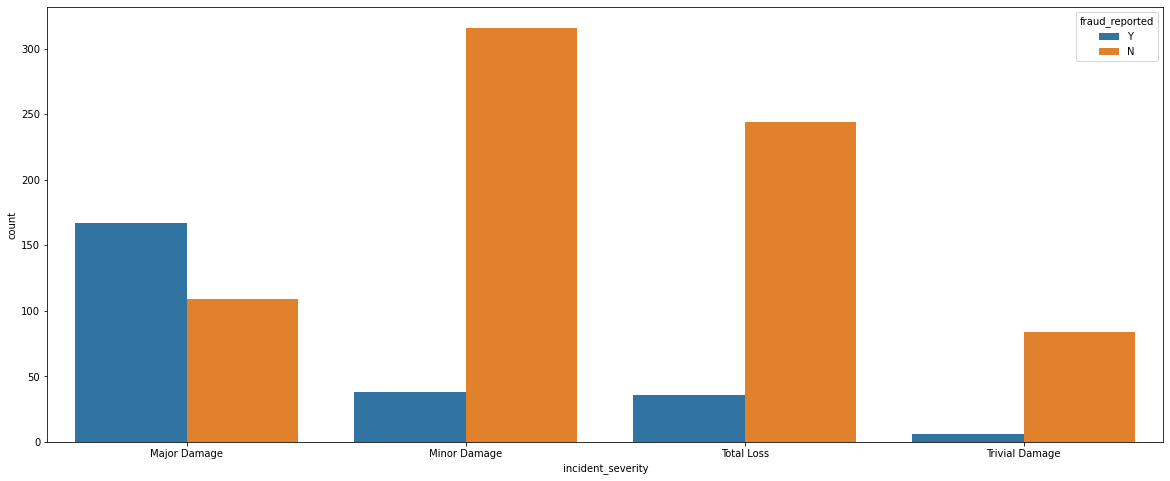

In [19]:

plt.figure(figsize=[20,8])
sns.countplot(df['incident_severity'], hue='fraud_reported', data=df)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

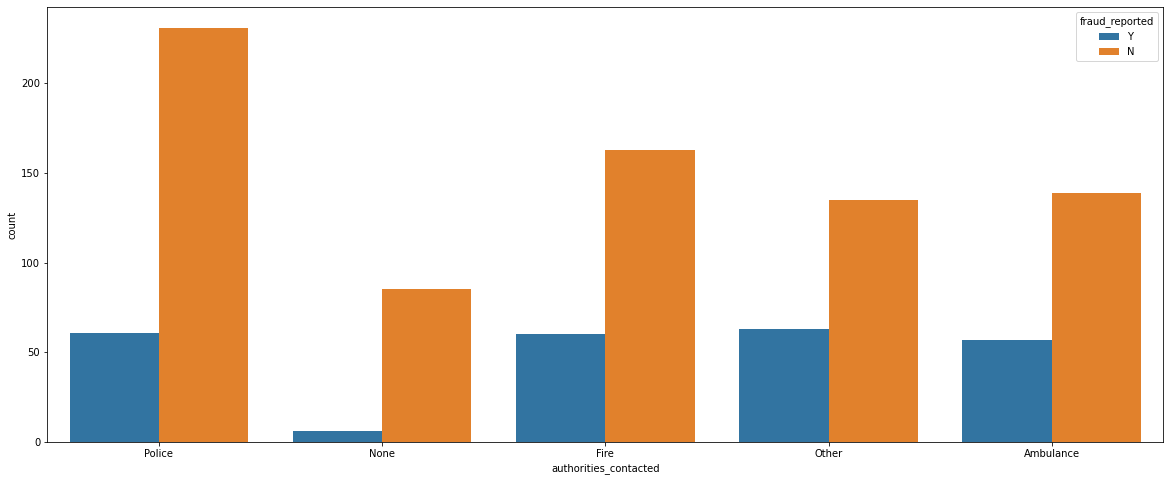

In [20]:

plt.figure(figsize=[20,8])
sns.countplot(df['authorities_contacted'], hue='fraud_reported', data=df)

In [21]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

age


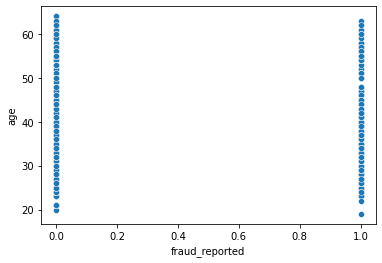

policy_number


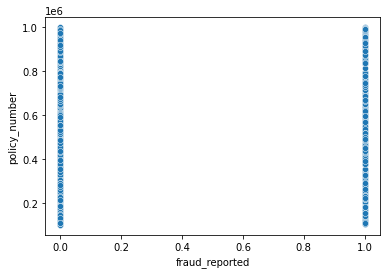

policy_bind_date


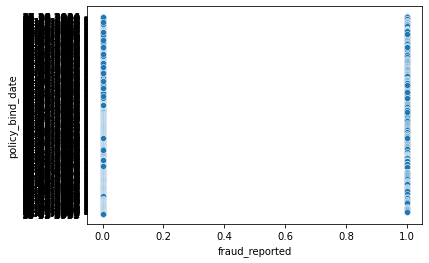

policy_state


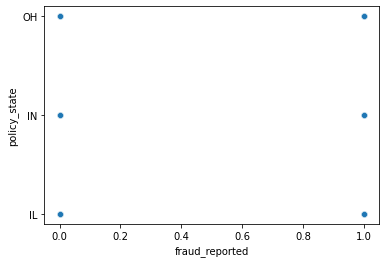

policy_csl


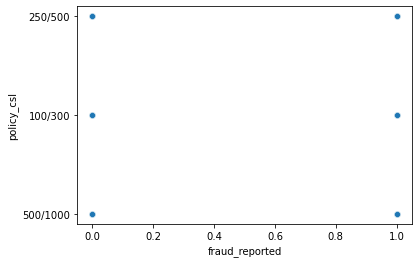

policy_deductable


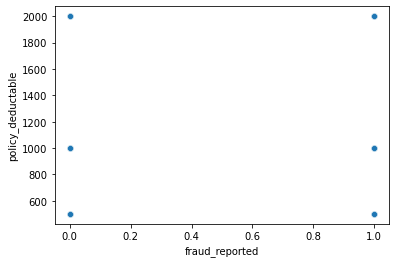

policy_annual_premium


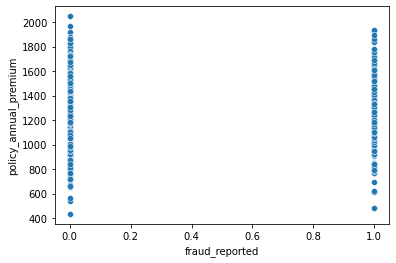

umbrella_limit


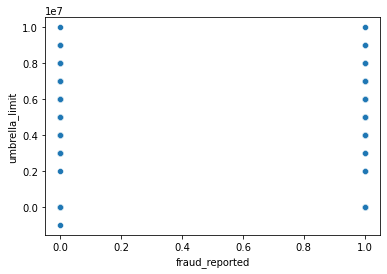

insured_zip


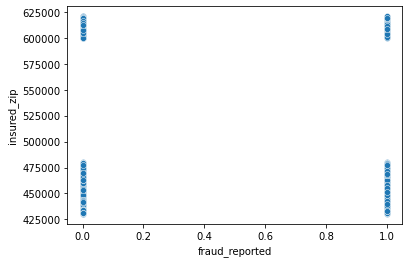

insured_sex


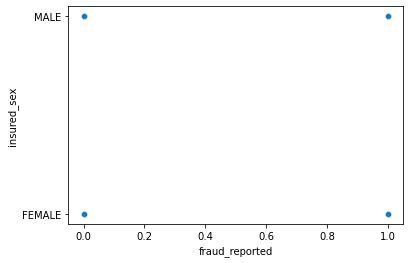

insured_education_level


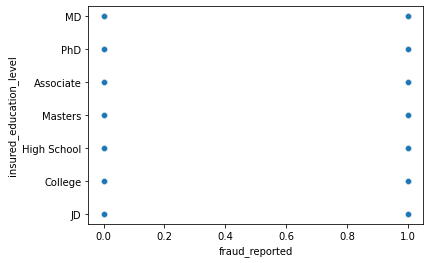

insured_occupation


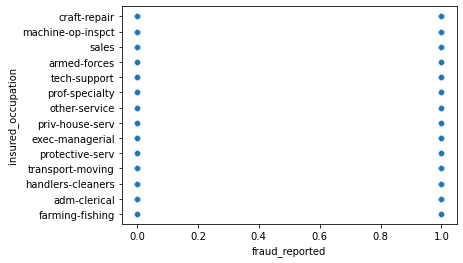

insured_hobbies


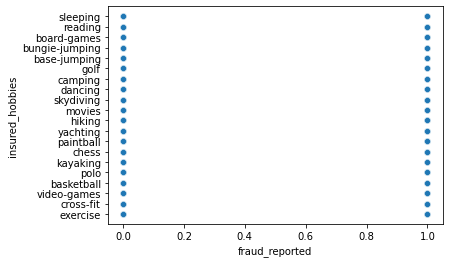

insured_relationship


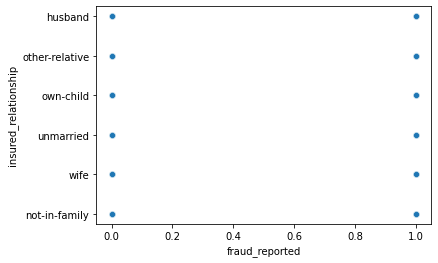

capital-gains


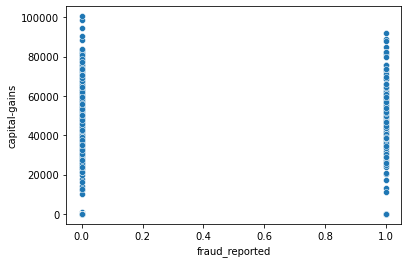

capital-loss


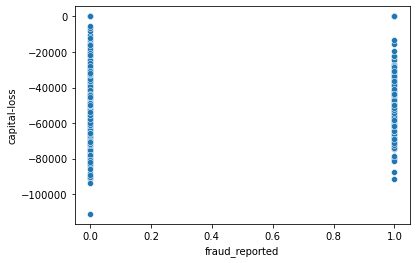

incident_date


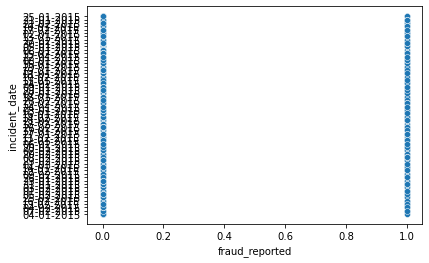

incident_type


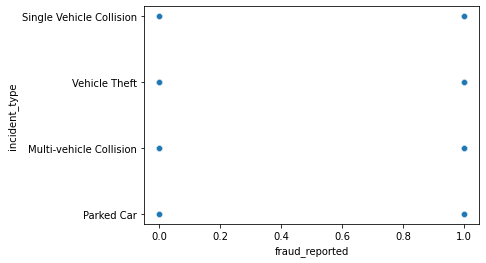

collision_type


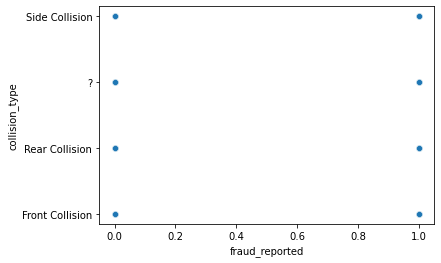

incident_severity


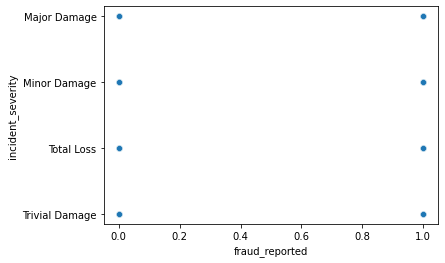

authorities_contacted


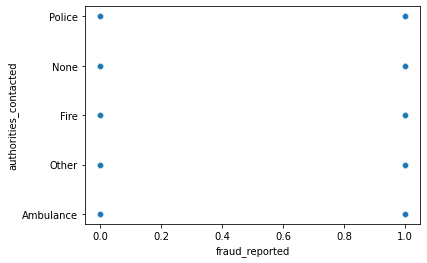

incident_state


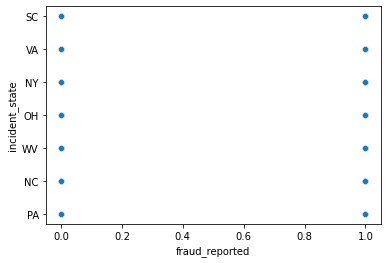

incident_city


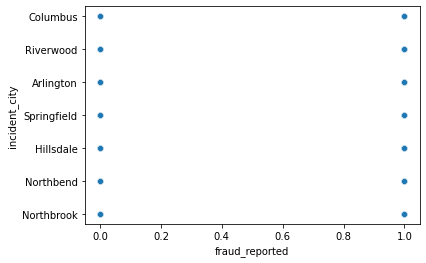

incident_location


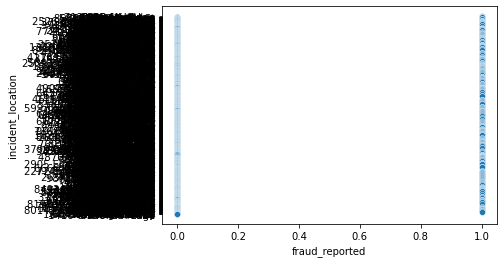

incident_hour_of_the_day


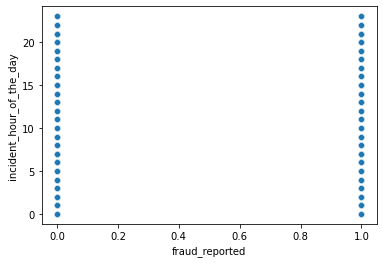

number_of_vehicles_involved


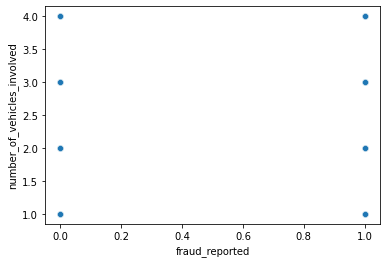

property_damage


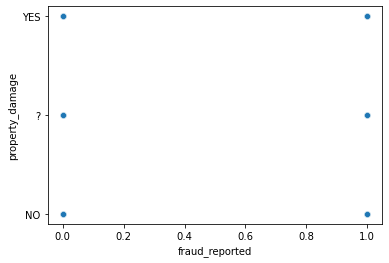

bodily_injuries


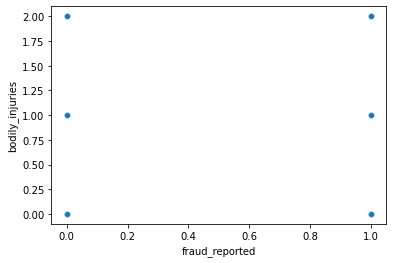

witnesses


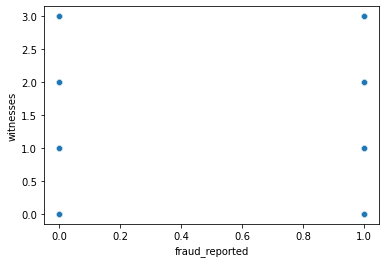

police_report_available


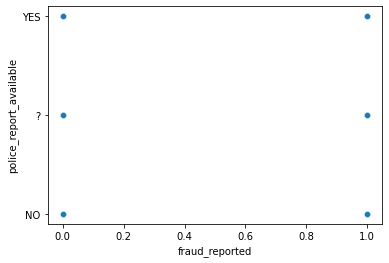

total_claim_amount


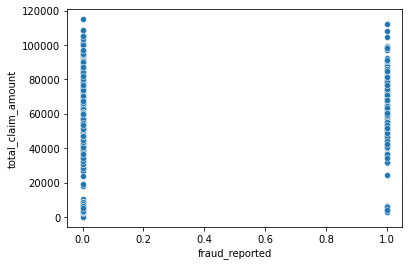

injury_claim


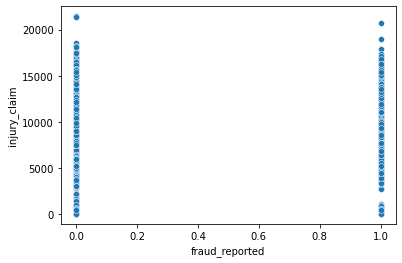

property_claim


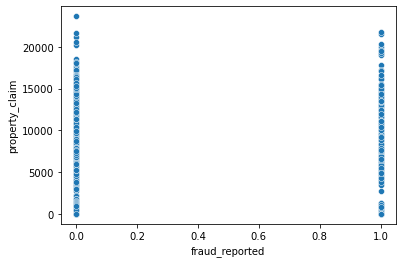

vehicle_claim


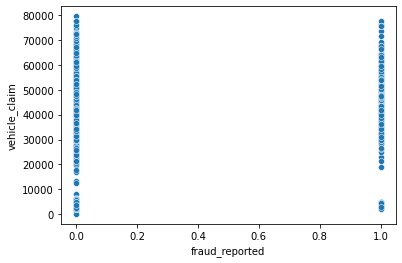

auto_make


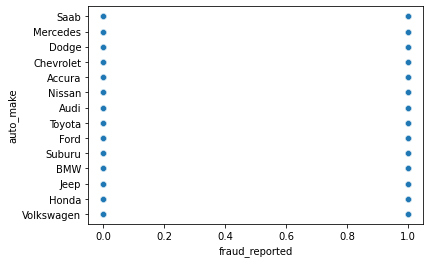

auto_model


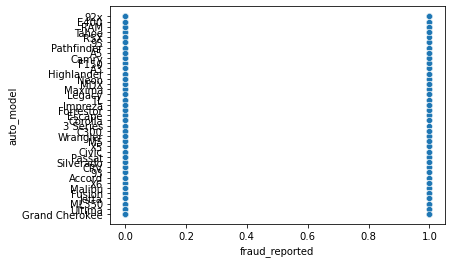

auto_year


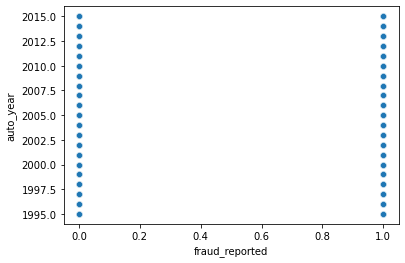

fraud_reported


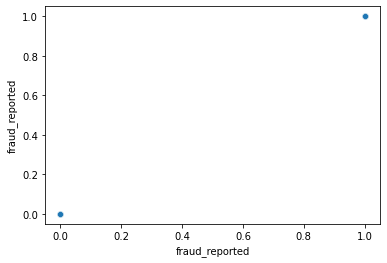

In [22]:
col=df.columns
col
for i in col[1:]:
    print(i)
    plt.figure()
    sns.scatterplot(data=df,x='fraud_reported',y=i)
    plt.show()

<AxesSubplot:>

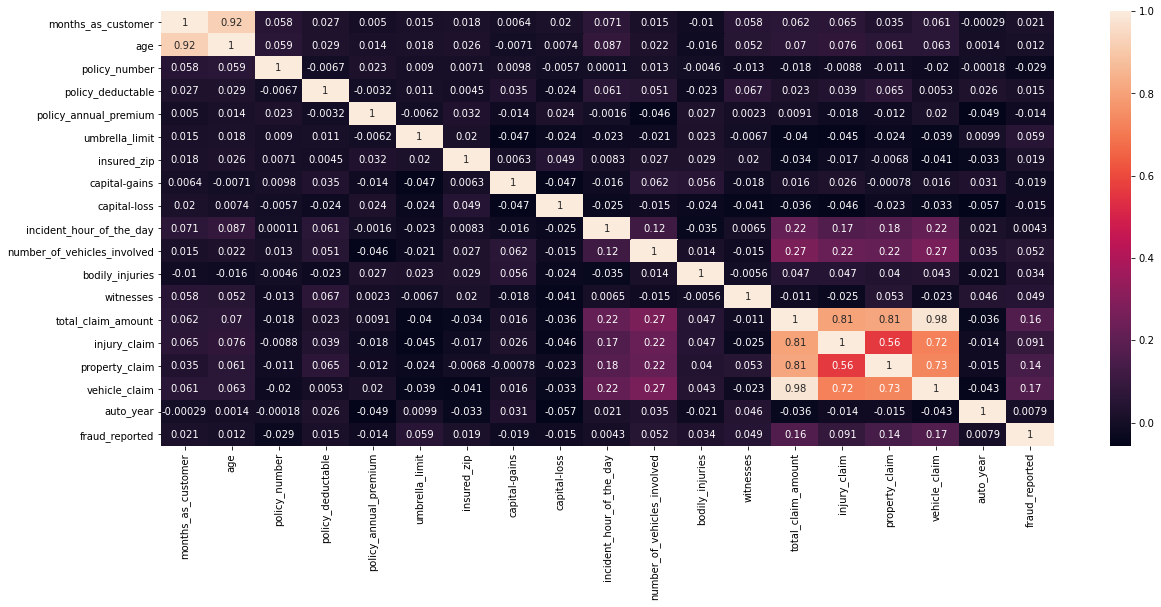

In [23]:
#cheking correlation
plt.figure(figsize=[20,8])
sns.heatmap(df.corr(),annot=True)

In [24]:
df.corr()["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
auto_year                      0.007928
incident_hour_of_the_day       0.004316
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
policy_number                 -0.029443
Name: fraud_reported, dtype: float64

As we see vehicle_claim is highly correlated and policy_number is highly negatively correlated

In [25]:
# dropping unimportant columns

df = df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location',  
    'auto_year', 
    'incident_hour_of_the_day'])

In [26]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,92x,1
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,?,5070,780,780,3510,Mercedes,E400,1
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,0
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,RSX,0


In [27]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' +str(df[column].nunique()))
        print(df[column].value_counts())
        print('_______________________________________________')

policy_state : 3
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
_______________________________________________
policy_csl : 3
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
_______________________________________________
insured_sex : 2
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
_______________________________________________
insured_education_level : 7
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
_______________________________________________
insured_occupation : 14
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing  

In [28]:
#filling null values
df["collision_type"].fillna('Rear Collision',inplace=True)
df["property_damage"].fillna('NO',inplace=True)
df["police_report_available"].fillna('NO',inplace=True)

months_as_customer                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
age                             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
policy_deductable               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
policy_annual_premium           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
umbrella_limit                    AxesSubplot(0.125,0.518913;0.168478x0.16413)
capital-gains                  AxesSubplot(0.327174,0.518913;0.168478x0.16413)
capital-loss                   AxesSubplot(0.529348,0.518913;0.168478x0.16413)
number_of_vehicles_involved    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
bodily_injuries                   AxesSubplot(0.125,0.321957;0.168478x0.16413)
witnesses                      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
total_claim_amount             AxesSubplot(0.529348,0.321957;0.168478x0.16413)
injury_claim                   AxesSubplot(0.731522,0.321957;0.168478x0.16413)
property_claim                       AxesSubplot(0.1

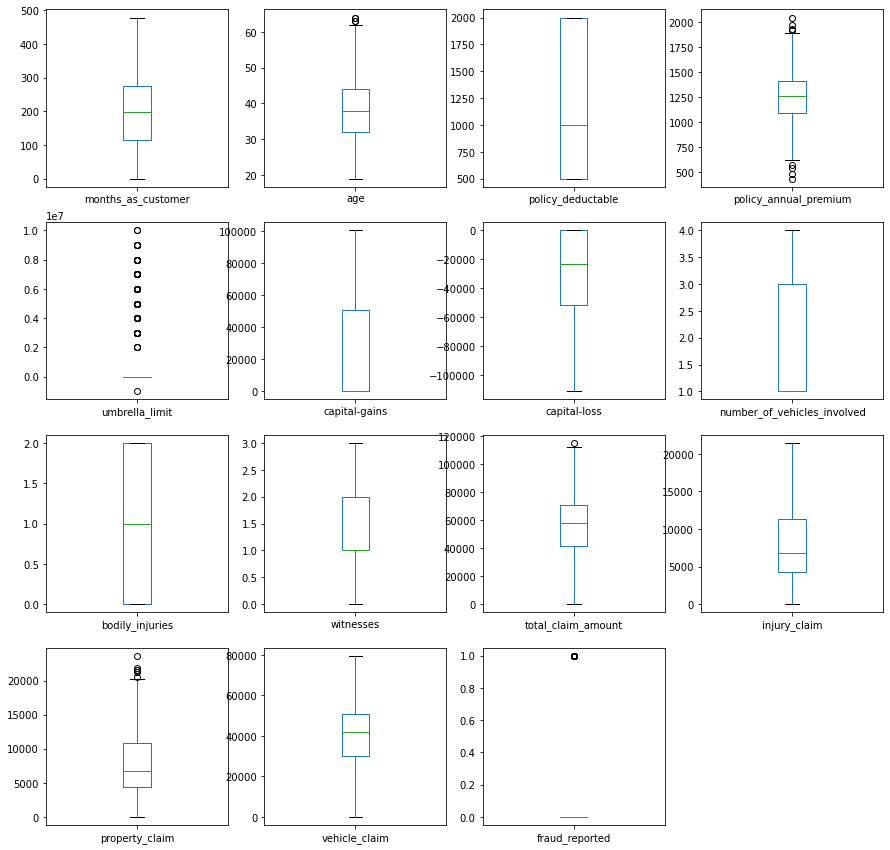

In [29]:
#checking outlier
df.plot(kind='box', figsize=(15,15), layout=(4,4), sharex=False, subplots=True)

As we see there is no need to remove outlier

In [30]:
#changing object data into numeric form
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [31]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [32]:
#cheking skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967


<function matplotlib.pyplot.show(close=None, block=None)>

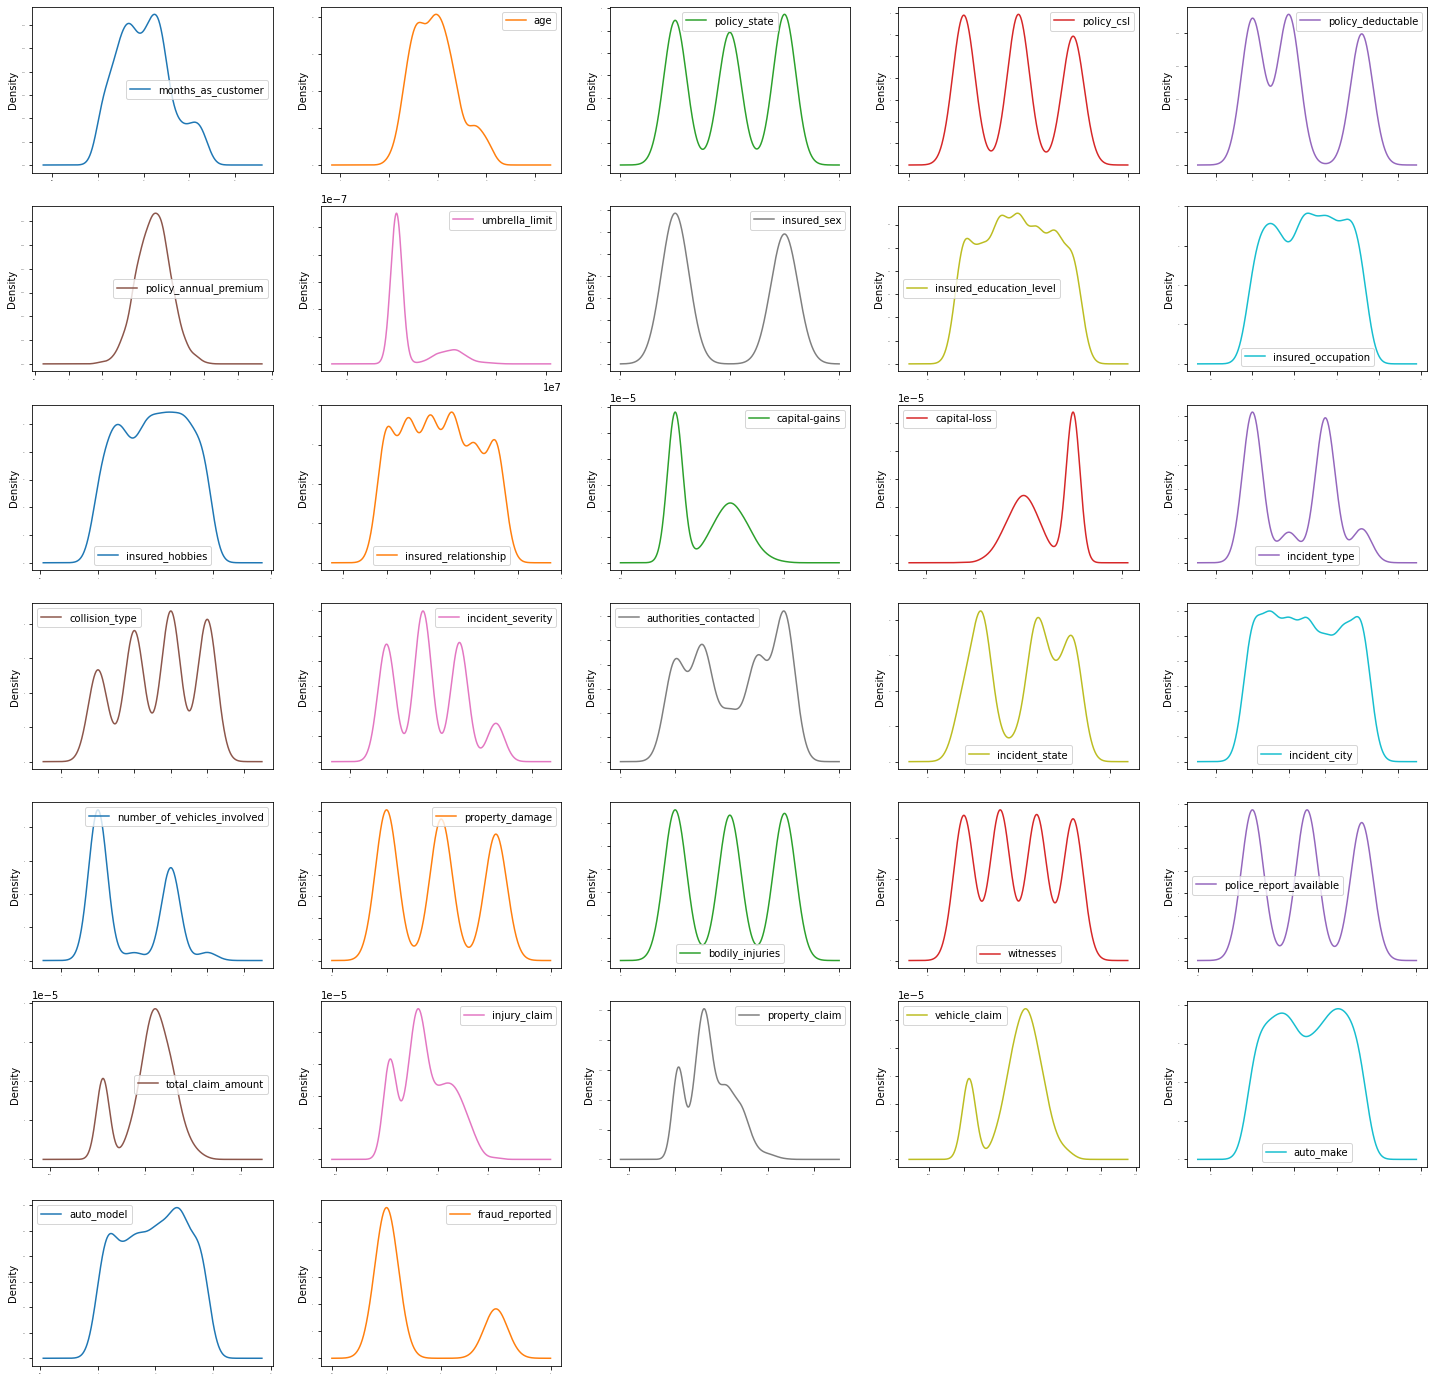

In [33]:
#checking distribution
df.plot(kind="density",subplots=True,layout=(7,5),sharex=False,fontsize=1,figsize=(25,25))
plt.show

In [34]:
x=df.drop("fraud_reported",axis=1)
y=df["fraud_reported"]

In [35]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Now we will use various model

In [37]:
#logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 78.0
[[138  15]
 [ 29  18]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       153
           1       0.55      0.38      0.45        47

    accuracy                           0.78       200
   macro avg       0.69      0.64      0.66       200
weighted avg       0.76      0.78      0.77       200



In [38]:
#knneighbour classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  78.0
[[143  10]
 [ 34  13]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       153
           1       0.57      0.28      0.37        47

    accuracy                           0.78       200
   macro avg       0.69      0.61      0.62       200
weighted avg       0.75      0.78      0.75       200



In [39]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  80.5
[[137  16]
 [ 23  24]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       153
           1       0.60      0.51      0.55        47

    accuracy                           0.81       200
   macro avg       0.73      0.70      0.71       200
weighted avg       0.80      0.81      0.80       200



In [40]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  81.5
[[133  20]
 [ 17  30]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       153
           1       0.60      0.64      0.62        47

    accuracy                           0.81       200
   macro avg       0.74      0.75      0.75       200
weighted avg       0.82      0.81      0.82       200



In [41]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  79.5
[[141  12]
 [ 29  18]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       153
           1       0.60      0.38      0.47        47

    accuracy                           0.80       200
   macro avg       0.71      0.65      0.67       200
weighted avg       0.78      0.80      0.78       200



In [42]:
#checking cross validatio score
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression model :",scr.mean())

scr=cross_val_score(rfc, x, y, cv=5)
print("Cross validation score of Random Forest model :",scr.mean())

scr=cross_val_score(knn, x, y, cv=5)
print ("Cross validation score of knn model :",scr.mean())
      
scr=cross_val_score(gb, x, y, cv=5)
print ("Cross validation score of gb model :",scr.mean())

scr=cross_val_score(dt, x, y, cv=5)
print ("Cross validation score of dt model :",scr.mean())

Cross validation score of Logistic Regression model : 0.773
Cross validation score of Random Forest model : 0.7630000000000001
Cross validation score of knn model : 0.733
Cross validation score of gb model : 0.808
Cross validation score of dt model : 0.795


so finally GradientBoostingClassifier is giving high accuracy so we will hypertuned this model

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)

In [44]:
gb=GradientBoostingClassifier()

In [45]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'learning_rate':np.arange(0.1,1,0.1)}

In [46]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(gb,param_grid,cv=5,n_jobs=-1)
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [47]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [48]:
y_pred=clf.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
accuracy

0.768

In [49]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[151,  25],
       [ 33,  41]], dtype=int64)

In [55]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7060042997542997

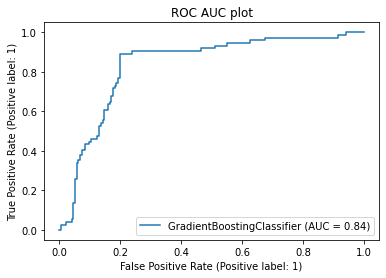

In [52]:
#checking roc,auc curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# conclusion

so our final accuracy is 84% and our best model is GradientBoostingClassifier